In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import os
import zipfile
import shutil
from glob import glob


from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

from tensorflow.keras.applications import Xception, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
gen = ImageDataGenerator(rotation_range=10, shear_range=.2,
                        horizontal_flip=True, rescale=1./255)

data_gen = gen.flow_from_directory(directory='dog_image/train',
                       batch_size=4, shuffle=True,
                       target_size=(100, 100),
                       class_mode = 'sparse')

Found 886 images belonging to 4 classes.


{'chihuahua': 0, 'jindodog': 1, 'shepherd': 2, 'yorkshire_terrier': 3}
4
sparse
label=> 2.0
label=> 1.0
label=> 1.0
label=> 1.0


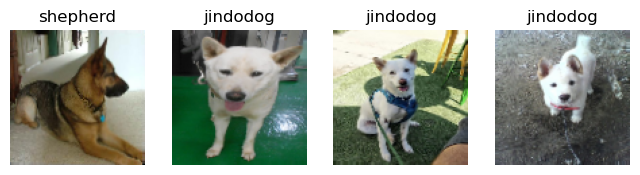

In [ ]:
print(data_gen.class_indices)
print(data_gen.num_classes)
print(data_gen.class_mode)

img, label = data_gen.next()
class_name = {0:'chihuahua', 1:'jindodog', 2:'shepherd', 3:'yorkshire_terrier'}



for i in range(len(label)):
    print('label=>', label[i])


plt.figure(figsize=(8, 8))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.title(class_name[int(label[i])])
    plt.imshow(img[i])
    plt.axis('off')


In [ ]:
shepherd_list = glob('dog_image/train/shepherd/*')

In [ ]:
shepherd_list

['dog_image/train/shepherd\\n02106662_10122.jpg',
 'dog_image/train/shepherd\\n02106662_10338.jpg',
 'dog_image/train/shepherd\\n02106662_104.jpg',
 'dog_image/train/shepherd\\n02106662_10490.jpg',
 'dog_image/train/shepherd\\n02106662_10552.jpg',
 'dog_image/train/shepherd\\n02106662_10676.jpg',
 'dog_image/train/shepherd\\n02106662_10715.jpg',
 'dog_image/train/shepherd\\n02106662_10858.jpg',
 'dog_image/train/shepherd\\n02106662_1094.jpg',
 'dog_image/train/shepherd\\n02106662_11620.jpg',
 'dog_image/train/shepherd\\n02106662_11808.jpg',
 'dog_image/train/shepherd\\n02106662_12028.jpg',
 'dog_image/train/shepherd\\n02106662_12116.jpg',
 'dog_image/train/shepherd\\n02106662_12906.jpg',
 'dog_image/train/shepherd\\n02106662_12969.jpg',
 'dog_image/train/shepherd\\n02106662_13050.jpg',
 'dog_image/train/shepherd\\n02106662_13123.jpg',
 'dog_image/train/shepherd\\n02106662_13178.jpg',
 'dog_image/train/shepherd\\n02106662_13368.jpg',
 'dog_image/train/shepherd\\n02106662_13380.jpg',
 'd

In [ ]:
shepherd_list[0].split('\\')[1]

'n02106662_10122.jpg'

In [ ]:
import os

def changeName(path, cName):
    i = 1
    for filename in os.listdir(path):
        print(path+filename, '=>', path+str(cName)+str(i)+'.jpg')
        os.rename(path+filename, path+str(cName)+str(i)+'.jpg')
        i += 1

In [ ]:

changeName('dog_image/train/German_shepherd/','German_shepherd_')

dog_image/train/German_shepherd/German_shepherd1.jpg => dog_image/train/German_shepherd/German_shepherd_1.jpg
dog_image/train/German_shepherd/German_shepherd10.jpg => dog_image/train/German_shepherd/German_shepherd_2.jpg
dog_image/train/German_shepherd/German_shepherd100.jpg => dog_image/train/German_shepherd/German_shepherd_3.jpg
dog_image/train/German_shepherd/German_shepherd101.jpg => dog_image/train/German_shepherd/German_shepherd_4.jpg
dog_image/train/German_shepherd/German_shepherd102.jpg => dog_image/train/German_shepherd/German_shepherd_5.jpg
dog_image/train/German_shepherd/German_shepherd103.jpg => dog_image/train/German_shepherd/German_shepherd_6.jpg
dog_image/train/German_shepherd/German_shepherd104.jpg => dog_image/train/German_shepherd/German_shepherd_7.jpg
dog_image/train/German_shepherd/German_shepherd105.jpg => dog_image/train/German_shepherd/German_shepherd_8.jpg
dog_image/train/German_shepherd/German_shepherd106.jpg => dog_image/train/German_shepherd/German_shepherd_9

# 진돗개 준비

In [ ]:
print('a')

a


In [ ]:
jindodog_list = glob('dog_image/train/jindodog/*')

In [ ]:
jindodog_list

['dog_image/train/jindodog\\google_0004.jpg',
 'dog_image/train/jindodog\\google_0005.jpg',
 'dog_image/train/jindodog\\google_0006.jpg',
 'dog_image/train/jindodog\\google_0007.jpg',
 'dog_image/train/jindodog\\google_0008.jpg',
 'dog_image/train/jindodog\\google_0014.jpg',
 'dog_image/train/jindodog\\google_0015.jpg',
 'dog_image/train/jindodog\\google_0016.jpg',
 'dog_image/train/jindodog\\google_0017.jpg',
 'dog_image/train/jindodog\\google_0018.jpg',
 'dog_image/train/jindodog\\google_0020.jpg',
 'dog_image/train/jindodog\\google_0022.jpg',
 'dog_image/train/jindodog\\google_0023.jpg',
 'dog_image/train/jindodog\\google_0026.jpg',
 'dog_image/train/jindodog\\google_0028.jpg',
 'dog_image/train/jindodog\\google_0029.jpg',
 'dog_image/train/jindodog\\google_0031.jpg',
 'dog_image/train/jindodog\\google_0036.jpg',
 'dog_image/train/jindodog\\google_0037.jpg',
 'dog_image/train/jindodog\\google_0039.jpg',
 'dog_image/train/jindodog\\google_0040.jpg',
 'dog_image/train/jindodog\\google

In [ ]:
jindodog_list[0].split('\\')[-1]

'google_0004.jpg'

In [ ]:
import os

def changeName(path, cName):
    i = 1
    for filename in os.listdir(path):
        print(path+filename, '=>', path+str(cName)+str(i)+'.jpg')
        os.rename(path+filename, path+str(cName)+str(i)+'.jpg')
        i += 1

In [ ]:

changeName('dog_image/train/jindodog/','jindodog_')

dog_image/train/jindodog/google_0004.jpg => dog_image/train/jindodog/jindodog_1.jpg
dog_image/train/jindodog/google_0005.jpg => dog_image/train/jindodog/jindodog_2.jpg
dog_image/train/jindodog/google_0006.jpg => dog_image/train/jindodog/jindodog_3.jpg
dog_image/train/jindodog/google_0007.jpg => dog_image/train/jindodog/jindodog_4.jpg
dog_image/train/jindodog/google_0008.jpg => dog_image/train/jindodog/jindodog_5.jpg
dog_image/train/jindodog/google_0014.jpg => dog_image/train/jindodog/jindodog_6.jpg
dog_image/train/jindodog/google_0015.jpg => dog_image/train/jindodog/jindodog_7.jpg
dog_image/train/jindodog/google_0016.jpg => dog_image/train/jindodog/jindodog_8.jpg
dog_image/train/jindodog/google_0017.jpg => dog_image/train/jindodog/jindodog_9.jpg
dog_image/train/jindodog/google_0018.jpg => dog_image/train/jindodog/jindodog_10.jpg
dog_image/train/jindodog/google_0020.jpg => dog_image/train/jindodog/jindodog_11.jpg
dog_image/train/jindodog/google_0022.jpg => dog_image/train/jindodog/jindo

# 전체 경로 준비

In [ ]:
file_path = '/content/dog_image/train/'

In [ ]:
label_name_list = os.listdir(file_path)
label_name_list

['chihuahua', 'German_shepherd', 'jindodog', 'yorkshire_terrier']

In [ ]:
for label_name in label_name_list:
    file_names = os.listdir(os.path.join(file_path, label_name))

    jpg_list = glob(file_path + label_name + '/*.jpg')
    print(label_name, len(file_names), len(jpg_list))

chihuahua 200 200
German_shepherd 152 152
jindodog 337 337
yorkshire_terrier 200 200


- 파일명은 label_name_counting.jpg

- counting 시작은 1

# Project-1

## 경로 설정

In [36]:
### Colab
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image')

TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image/train/')
TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image/test/')
print(TRAIN_DATA_ROOT_DIR, TEST_DATA_ROOT_DIR)

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image')
print(DATA_ROOT_DIR)

# #### Colab
# ROOT_DIR = '/content'
# DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'Blood_cell')
# TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'TRAIN')
# TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'TEST')
# TEST_SIMPLE_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'TEST_SIMPLE')

/content/dog_image/train/ /content/dog_image/test/
/content/dog_image


In [37]:
#### Colab

from google.colab import drive

drive.mount("/content/gdrive")

data_path = "/content/gdrive/MyDrive/"

ROOT_DIR = "/content"


shutil.copy(os.path.join(data_path, "dog_image.zip"), ROOT_DIR)

if os.path.exists(DATA_ROOT_DIR):
    shutil.rmtree(DATA_ROOT_DIR)

with zipfile.ZipFile(os.path.join(ROOT_DIR, "dog_image.zip")) as target_file:
    target_file.extractall(DATA_ROOT_DIR)
    print("success!")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
success!


In [9]:
# #### Colab

# from google.colab import drive

# drive.mount('/content/gdrive')
# data_path = "/content/gdrive/MyDrive/"

# shutil.copy(os.path.join(data_path, 'dog_image.zip'), ROOT_DIR)

# if os.path.exists(DATA_ROOT_DIR):
#     shutil.rmtree(DATA_ROOT_DIR)

# with zipfile.ZipFile(os.path.join(ROOT_DIR, 'dog_image.zip'), 'r') as target_file:
#     target_file.extractall(DATA_ROOT_DIR)

Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
# ### PC
# ROOT_DIR = 'content'

In [ ]:
# if os.path.exists(os.path.join(ROOT_DIR, 'dog_image')):
#     shutil.rmtree(os.path.join(ROOT_DIR, 'dog_image'))
#     print('dog_image is deleted')

# with zipfile.ZipFile(os.path.join(ROOT_DIR, 'dog_image.zip'), 'r') as target_file:
#     target_file.extractall(os.path.join(ROOT_DIR, 'dog_image'))

In [38]:
label_name_list = os.listdir(os.path.join(ROOT_DIR, 'dog_image/train/'))
print('total :', len(label_name_list))
print(label_name_list)

total : 4
['jindodog', 'chihuahua', 'yorkshire_terrier', 'German_shepherd']


In [39]:
# test 없으면 생성
if not os.path.exists(os.path.join(ROOT_DIR, 'dog_image/test')):
    os.mkdir(os.path.join(ROOT_DIR, 'dog_image/test'))

# 테스트 안에 폴더 생성
for label_name in label_name_list:
    # 있으면 삭제
    if os.path.exists(os.path.join(TEST_DATA_ROOT_DIR, label_name)):
        shutil.rmtree(os.path.join(ROOT_DIR, label_name))
    else:
        os.mkdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))

## Shuffle 후 다시 Testing으로

In [40]:
#### 이동할 비율
MOVE_RATIO = .2

label_name_list = os.listdir(os.path.join(ROOT_DIR, 'dog_image/train/'))

label_name_list

['jindodog', 'chihuahua', 'yorkshire_terrier', 'German_shepherd']

In [ ]:
# TRAIN_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image/train/')
# TEST_DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'dog_image/test/')
# print(TRAIN_DATA_ROOT_DIR, TEST_DATA_ROOT_DIR)

content\dog_image/train/ content\dog_image/test/


In [41]:


for label_name in label_name_list:
    src = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    dst = os.path.join(TEST_DATA_ROOT_DIR, label_name)

    train_data_file_list = os.listdir(src)

    print('====================================')
    print('total [%s] data file nums => [%s]'%(label_name, len(train_data_file_list)))


    np.random.shuffle(train_data_file_list)
    print('train data shuffle is done.')

    split_num = int(MOVE_RATIO * len(train_data_file_list))
    print('split nums =>', split_num)

    test_data_file_list = train_data_file_list[0:split_num]

    move_num = 0
    for test_data_file in test_data_file_list:
        shutil.move(os.path.join(src, test_data_file),
                   os.path.join(dst, test_data_file))

        move_num = move_num + 1

    print('total move num =>', move_num)
    print(('===================================='))

total [jindodog] data file nums => [337]
train data shuffle is done.
split nums => 67
total move num => 67
total [chihuahua] data file nums => [200]
train data shuffle is done.
split nums => 40
total move num => 40
total [yorkshire_terrier] data file nums => [200]
train data shuffle is done.
split nums => 40
total move num => 40
total [German_shepherd] data file nums => [152]
train data shuffle is done.
split nums => 30
total move num => 30


## Image Shape 설정

In [42]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

## ImageDataGenerator를 이용하여 데이터 불러오기

In [43]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse',
                                                subset='training')

val_generator = train_data_gen.flow_from_directory(directory=TRAIN_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse',
                                                subset='validation')

test_generator = test_data_gen.flow_from_directory(directory=TEST_DATA_ROOT_DIR,
                                                batch_size=32, color_mode='rgb',
                                                target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                class_mode = 'sparse')

Found 570 images belonging to 4 classes.
Found 142 images belonging to 4 classes.
Found 177 images belonging to 4 classes.


## 모델링

In [45]:
pre_trained_model = MobileNet(weights='imagenet', include_top=False,
                             input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

pre_trained_model.summary()

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(Dropout(.65))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.5))

model.add(Dense(train_generator.num_classes, activation='softmax'))
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(2e-5), metrics=['acc'])

In [47]:
start_time = datetime.now()

result = model.fit(train_generator, epochs=20, validation_data=val_generator)

end_time = datetime.now()

print('Run time :', end_time - start_time)

Epoch 1/20
18/18 [==============================] - 21s 213ms/step - loss: 1.7186 - acc: 0.4000 - val_loss: 0.9619 - val_acc: 0.5845
Epoch 2/20
18/18 [==============================] - 3s 183ms/step - loss: 1.1656 - acc: 0.5281 - val_loss: 0.6389 - val_acc: 0.8169
Epoch 3/20
18/18 [==============================] - 6s 311ms/step - loss: 0.7529 - acc: 0.7123 - val_loss: 0.4618 - val_acc: 0.8803
Epoch 4/20
18/18 [==============================] - 6s 287ms/step - loss: 0.5972 - acc: 0.7947 - val_loss: 0.3604 - val_acc: 0.9155
Epoch 5/20
18/18 [==============================] - 3s 179ms/step - loss: 0.4433 - acc: 0.8561 - val_loss: 0.3007 - val_acc: 0.9437
Epoch 6/20
18/18 [==============================] - 4s 205ms/step - loss: 0.3475 - acc: 0.8754 - val_loss: 0.2623 - val_acc: 0.9437
Epoch 7/20
18/18 [==============================] - 4s 225ms/step - loss: 0.3065 - acc: 0.8947 - val_loss: 0.2354 - val_acc: 0.9437
Epoch 8/20
18/18 [==============================] - 4s 192ms/step - loss: 0

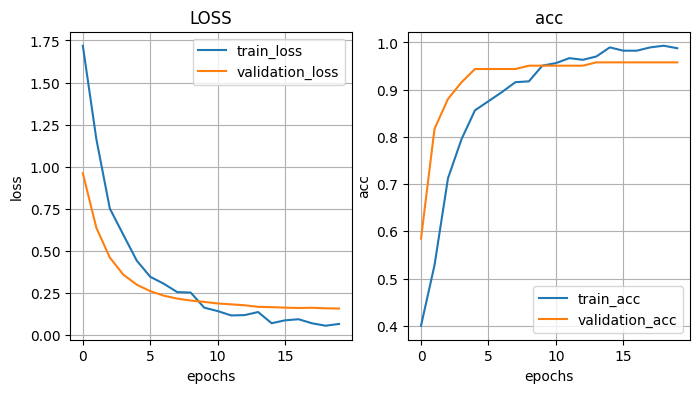

6/6 [==============================] - 1s 185ms/step - loss: 0.1095 - acc: 0.9718


[0.10952199250459671, 0.9717513918876648]

In [48]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")
# plt.show()

plt.subplot(1, 2, 2)

plt.title("acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()

plt.plot(result.history["acc"], label="train_acc")
plt.plot(result.history["val_acc"], label="validation_acc")
plt.legend(loc="best")
plt.show()


model.evaluate(test_generator)

In [ ]:
'''
1차 Mobilnet
히든 512 드롭 0.5 히든 128 드롭 0.5
[0.09732907265424728, 0.9774011373519897]
과적합 존재

2차 Mobilnet
히든 512 드롭 0.65
[0.06552224606275558, 0.9887005686759949]
좋음
'''

In [49]:
print(train_generator.class_indices)

{'German_shepherd': 0, 'chihuahua': 1, 'jindodog': 2, 'yorkshire_terrier': 3}


In [57]:
pred = model.predict(test_generator)
# pred_img, pred_label = pred
# print(pred_img, pred_label)
len(pred)

6/6 [==============================] - 1s 124ms/step


177

In [65]:
pred = model.predict(test_generator)
test_pred = pred[:16]

test_label = []
for i in test_pred:
  test_label.append(i.argmax())

6/6 [==============================] - 1s 122ms/step


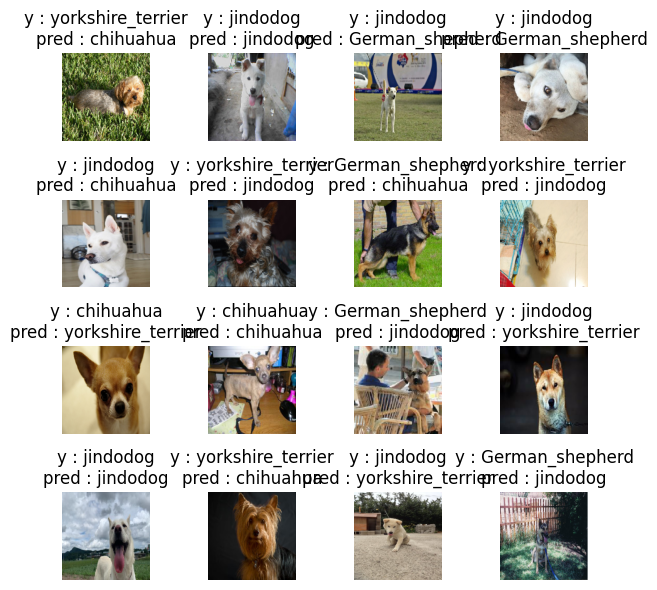

In [70]:
pred = model.predict(test_generator)
test_pred = pred[:16]

test_label = []
for i in test_pred:
  test_label.append(i.argmax())

img, label = train_generator.next()
img = img[:16]
label = label[:16]

class_name = {0: 'German_shepherd', 1: 'chihuahua', 2: 'jindodog', 3: 'yorkshire_terrier'}

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title('y : ' + class_name[int(label[i])] + '\n' + 'pred : ' + class_name[int(test_label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()


In [71]:
for_test = train_generator.next()

pred = model.predict(for_test)
test_pred = pred[:16]

test_label = []
for i in test_pred:
  test_label.append(i.argmax())

img, label = for_test
img = img[:16]
label = label[:16]

class_name = {0: 'German_shepherd', 1: 'chihuahua', 2: 'jindodog', 3: 'yorkshire_terrier'}

plt.figure(figsize=(6, 6))
for i in range(len(img)):
    plt.subplot(4, 4, i+1)
    plt.title('y : ' + class_name[int(label[i])] + '\n' + 'pred : ' + class_name[int(test_label[i])])
    plt.imshow(img[i])
    plt.axis('off')
plt.tight_layout()

ValueError: ignored

In [75]:
train_generator.next()

(array([[[[0.5647059 , 0.5294118 , 0.54901963],
          [0.58431375, 0.56078434, 0.5764706 ],
          [0.6       , 0.5764706 , 0.5921569 ],
          ...,
          [0.89019614, 0.9568628 , 0.98823535],
          [0.87843144, 0.9450981 , 0.9843138 ],
          [0.86666673, 0.9333334 , 0.9725491 ]],
 
         [[0.49803925, 0.454902  , 0.47058827],
          [0.53333336, 0.49803925, 0.50980395],
          [0.5568628 , 0.52156866, 0.53333336],
          ...,
          [0.8862746 , 0.94117653, 0.97647065],
          [0.9058824 , 0.9607844 , 0.9960785 ],
          [0.87843144, 0.9333334 , 0.9686275 ]],
 
         [[0.5176471 , 0.47058827, 0.47058827],
          [0.49411768, 0.44705886, 0.454902  ],
          [0.49411768, 0.454902  , 0.45882356],
          ...,
          [0.8941177 , 0.9450981 , 0.9686275 ],
          [0.95294124, 1.        , 1.        ],
          [0.90196085, 0.95294124, 0.9843138 ]],
 
         ...,
 
         [[0.7960785 , 0.7686275 , 0.7058824 ],
          [0.70196